## Introduction to Linear Regression

Welcome to Introduction To Linear Regression! This is the first of four lessons in the Linear Regression Modeling in Python course. Now that we've learned about the main types of machine learning (ML), it's time to explore specific models. Along the way, we'll learn different ML concepts by observing their use in fundamental models.

As the course title suggests, the focus of this entire course will be linear regression. Linear regression is a fantastic model to start from because it's one of the "workhorse" models used in a wide variety of fields, including business, science, and medicine. No matter how far you go in your ML journey with more complex models, the simplicity and usefulness of linear regression will always be valuable. Linear regressions are often the first model we turn to for an understanding of how two different phenomena relate.

<img src='lr.svg' width=400 height=400>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In this lesson, we'll focus on learning the main concepts and terms of linear regression. We'll also introduce the dataset and do some light programming to examine the data. At the end of the lesson, we'll make our first linear regression model

In [2]:
import pandas as pd
import numpy as np

In [3]:
auto=pd.read_csv('automobiles.csv')

In [4]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


### Examining The Data
Linear regression gets its name from the fact that the outcome is a linear combination of predictors. Since we have the auto dataset loaded in, let's take some time to understand it better.

The auto dataset has 26 columns and 159 rows. Each row contains various pieces of information on a particular car. For example, there's information on the fuel the car uses, the number of doors, and its horsepower. For a full description of the dataset, please refer to the UCI Machine Learning Repository's page https://archive.ics.uci.edu/ml/datasets/Automobile.
For this and the rest of the lessons in the Linear Regression course, we'll examine how the characteristics of the car relate to the normalized_losses column, which will be our outcome. This column represents the average payment that an insurance company pays when a car of that particular row has an accident. We want to predict this payment for other cars, so we'll use linear regression for this task.

We'll use this screen to familiarize ourselves with the data and divide it up into a training and test set. Next, we'll discuss the idea of regres

In [5]:
from sklearn.model_selection import train_test_split

#separate the features and target
x=auto.drop(columns=['normalized_losses'],axis=1)
y=auto['normalized_losses']

#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=726)

### Defining Regression
A great place to start with linear regression is the concept of regression itself. A regression (or regression analysis) is a technique that attempts to model the relationship between two sets of variables. One set of variables, called **predictors**, includes variables that we think influence the value of other variables of interest, which we refer to as the outcome. **(We also call predictors "features" or "covariates.")** A regression analysis tries to determine just how these predictors relate to the outcome, and we think of this mathematically as a function:

<img src='lrfunction.png' width=400 height=400>


The function **f** is what we call the regression. By using a regression, we're assuming that the value of **Y** can be split into two components:
The first part, f(X) describes how the predictors contribute to the outcome. The second part, ϵ, is called **error or noise.**The ϵ is there to essentially fill in the gap between f(X) and Y**.
(We will see later that this error is important for evaluating our models. The focus of this lesson is to understand **f(X)** which is the regression.
We also assume that the outcome Y is a numerical variable, as opposed to binary or categorical. For example, let's say that **Y** represents a risk score for a particular car. A higher risk score means that insurance premiums are higher. Let's also say that **X** represents the engine power. We might be interested in determining how the engine size relates to the risk score of the car. We can use regression to examine this association.

The "linear" in linear regression suggests that **f(X)** has a particular form. It assumes that the outcome **Y** can be described as a linear combination of the predictors, as shown below:

<img src='linear_combination.png' width=400 height=400>



<img src='exp.png' width=800 height=800>

<img src='llinear_regression.svg' width=400 height=400>

Together,β0 and β1 are known as the parameters of the model. Parameters are values that need to be learned from the data, and we use them to calculate the relationship between the predictors and outcome. When there is only a single predictor in the regression, we refer to this as simple linear regression. Nothing stops us from adding multiple predictors into a model, which turns it into a multiple linear regression.

<img src='relationship.png' width=600 height=600>

### Types of Predictors
Now that we know what our outcome **Y** is for the linear regression, it's time to consider the nature of predictors **X**

There are two categories of variables: **numerical and categorical**. As their name suggests, numerical variables contain numbers. These numbers can be discrete, taking on just a few values, or continuous, taking on any value in an interval. The height variable is a classic example of this.
The body_style column is an example of a categorical variable. Categorical variables indicate that the car belongs to a particular group. Categorical variables also include binary (i.e., "yes or no", 0 or 1) variables to indicate that a car either does or does not belong to a particular group.
The nature of the predictors can affect how they appear in the regression. Numerical predictors, such as length or height, can be included directly into a linear regression. We can't say the same for categorical variables.
If a categorical predictor contains three or more groups, then the categories need to be split up into separate dummy variables to be added into a linear regression. Each dummy variable will be 1 or 0, depending on whether or not the car is in a particular group. Furthermore, if a categorical predictor contains k predictors, then k−1 dummy variable will be used in the linear regression. The remaining category will be used as a "reference." We will explain the precise reason behind this in detail later. For now, it's crucial to understand how categorical variables are handled.
For example, let's say we want to include drive_wheels in a linear regression. drive_wheels has three categories ("4wd", "fwd" and "rwd"). If "4wd" is the reference, then the regression would have two new predictors corresponding to binary variables. One will correspond to if the car is "fwd" or not, while the other will do the same for "rwd." If both of these columns are 0, then the car is "4wd."


In [6]:
auto.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [7]:
auto['body_style'].value_counts()

sedan          79
hatchback      56
wagon          17
hardtop         5
convertible     2
Name: body_style, dtype: int64

In [8]:
auto['drive_wheels'].value_counts()

fwd    105
rwd     46
4wd      8
Name: drive_wheels, dtype: int64

In [9]:
auto_with_dummies=pd.get_dummies(auto['drive_wheels'])

In [10]:
auto_with_dummies.head()

,4wd,fwd,rwd
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


### The Cost Function
Recall that for a multiple linear regression, the outcome is expressed as a linear combination of the predictors, plus some error:

<img src='lc.png' width=400 height=400>

Once the coefficients are learned, we'll have a working linear regression that we can use for prediction. But given only the data, we don't know what they should be. We should ask ourselves **How do we get the coefficient βi for each predictor?** We should not pick these coefficients arbitrarily; rather, the data that we've collected should determine the selection. We'll dedicate this screen and the next to understanding how the βi are calculated. 
The first step in this process is to understand how we quantify the predictive ability of a linear regression. For each outcome Y, a linear regression will make its best guess in the form of β0+β1X1+...+βpXp. The difference is captured by the ϵ. Intuitively, the smaller these errors ϵ are, the "better" the linear regression predicts the outcome. To visualize this in the case of a single predictor, the errors are represented by the vertical red bars:

<img src='error.svg' width=500 height=500>

The β is what adjusts the slope, so we should try to pick the **βi that minimizes the error (i.e. minimizing the size of the red bars).** Even though we can't visualize more than 3 dimensions, the intuition in the graph remains the same when we have multiple coefficients. This is also known as the **method of least squares**. Following this principle will give us the best βi, given the data we collected.
Each observation has its own error, so we should try to summarize the total error across the entire dataset and optimize the β based on this sum. However, instead of optimizing on the sum of the errors, we should use the sum of squared errors (SSE) instead:
<img src='sse.png' width=500 height=500>

This function, L, has a special name: the cost function, sometimes referred to as "loss." So, we choose the coefficients that minimize the cost function. This is a general concept that will come up in various machine learning models, so it's worth taking the time to learn these terms. Different models may use different cost functions, but the motivation stays the same: finding the best parameters based on the data.
This function, **L**, has a special name: **the cost function**, sometimes referred to as **"loss."** So, we choose the coefficients that minimize the cost function. This is a general concept that will come up in various machine learning models, so it's worth taking the time to learn these terms. Different models may use different cost functions, but the motivation stays the same: **finding the best parameters based on the data.**

In [11]:
#We've given three beta parameters in the code editor. Using length as the first 
#predictor and engine_size as the second predictor, calculate the squared error 
#for each observation in the training data. Assign the result to the variable se.
#@Calculate the SSE based on these squared errors. Assign this value to the variable sse.

beta0 = 5
beta1 = 3
beta2 = 2

se= (y_train - (beta0 + x_train['length']*beta1 + x_train['engine_size']*beta2))**2
se=sum(se)
se

53688428.790000014

### Estimating the Best Coefficients
We can express the outcome, predictors, and errors in matrix format.
<img src='matrix.png' width=400 width=400>

Rather than express things in terms of the individual observations, we can store all of the information in matrices. Above, ϵ
 is the column vector containing the errors ϵi. Y is the column vector containing the outcomes Finally, X is a matrix of the predictors. The expression of the cost function in terms of a sum of observations and the matrices is equivalent.
 By choosing the best β, we mean the β that minimizes the cost function. Using calculus, we know that the β that minimizes L(β0,β1,..βp) are those that make its derivative zero. Using mathematical notation, we write this as follows.
<img src='dydx_lossfunction.png' width=500 height=500>

<img src='a.png' width=600 height=600>

Calculating the derivative of the cost function is out of scope for this lesson. Understanding the derivation requires some familiarity with matrix calculus, which is a specific notation for applying calculus concepts to matrices. If you're interested in the derivation, we recommend that you read Eli Bendersky's wonderful walkthrough of the derivation on his blog http://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/

<img src='cf.png' width=400 height=400>

Notice that 
^
β
 can be calculated purely in terms of the observed data. This means that we can derive the linear regression coefficients for a given set of predictors and outcomes with some linear algebra. This equation will work for both simple and multiple linear regression.

This calculation requires three matrix operations: taking an inverse, and multiplying two matrices together. The corresponding functions in **numpy** that allow us to do this are:
- the np.matmul() function: It takes two matrices (DataFrames) and multiplies them together.
- the np.transpose() function. It takes a single matrix and outputs its transpose.
- the np.linalg.inv() function. It takes a single matrix and outputs its inverse.

In [12]:
x_train.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
105,0,subaru,gas,std,four,wagon,fwd,front,97.0,173.5,...,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463
116,0,toyota,gas,std,four,hatchback,fwd,front,95.7,166.3,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198
12,1,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6377
127,2,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639
89,-1,plymouth,gas,std,four,wagon,fwd,front,103.3,174.6,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921


In [13]:
import numpy as np

x_train_subset=x_train[['length','engine_size']]

x_train_subset['intercept']=1

xx_inv= np.linalg.inv(np.matmul(np.transpose(x_train_subset),x_train_subset))
xy= np.matmul(np.transpose(x_train_subset),y_train)

beta_hat= np.matmul(xx_inv, xy)

C:\Users\512GB\AppData\Local\Temp\ipykernel_6452\3730318009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_subset['intercept']=1
C:\Users\512GB\AppData\Local\Temp\ipykernel_6452\3730318009.py:7: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  xx_inv= np.linalg.inv(np.mat

In [14]:
beta_hat

array([ -0.54875428,   0.41198617, 164.68686429])

## Review
Congratulations on finishing the first lesson in the Linear Regression Modeling in Python course! In this lesson, we learned about the components of a linear regression model — and how to calculate the regression parameters. We learned that the regression coefficients derive from minimizing the sum of squared errors, which we refer to as the cost function.

In later lessons, we won't need to perform all of the bulky matrix multiplication by hand in order to calculate the coefficients. Instead, we'll use the scikit-learn library, which takes all of that hand calculation and abstracts it away into a useful function. Before we do so, it's important to know why and how scikit-learn does what it does, which we learned in this lesson.
In the next lesson, we'll learn how to interpret a linear regression model.

## Interpreting Regression Parameters
Welcome to the second lesson in the Linear Regression Modeling in Python course. In the previous lesson, we learned about the **linear regression model**, and we derived how to calculate the coefficients using only the data. However, doing all of this every time can slow us down from actually using our models to make predictions. This is why Python libraries like scikit-learn are important: these libraries provide functions that abstract away the calculations so we can get straight to the modeling.
In this lesson, we'll learn how to create a linear regression model using the scikit-learn library to estimate the coefficients. To create the model, we'll also learn a general strategy for choosing potential predictors. Finally, we'll look more in-depth at the coefficients of a linear regression model. One of the main strengths of linear regression is that it lends itself well to meaningful interpretations. That means the coefficients tell us how the predictor associates with the outcome.


In [15]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [16]:
from sklearn.model_selection import train_test_split

x=auto.drop(columns=['normalized_losses'], axis=1)
y=auto['normalized_losses']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=727)

### The LinearRegression Object
On this screen, we'll learn how to begin the process of creating a linear model. The scikit-learn library dedicates an entire module to various types of linear models, including linear regression. (This module is aptly called linear_model.) Within this module is a class called LinearRegression, which we'll use for our linear regressions. In order to use the LinearRegression class, we need to import it, just like we've done with pandas and numpy. We can do this as follows:
The code above indicates that we want to extract the code for the LinearRegression class from the sklearn.linear_model module.

However, since we've only imported a class, we still don't have a linear regression model. The LinearRegression class is only the "blueprint" for the model, so we actually have to create, or instantiate it, as an object. We can do this by calling the class and assigning it to a variable, as follows:
By assigning the class to a variable and using the parentheses, we're creating a new LinearRegression() object. This new object hasn't been fit to any data yet, so there's not much we can do with it. As we've learned previously, fitting a model involves using data to learn the specific parameters for the model. In the case of "fitting" a linear regression, we mean to say we are learning or estimating the coefficients.

In [17]:
from sklearn.linear_model import LinearRegression

#instantiate the class
model=LinearRegression()

### Fitting a LinearRegression Object
On the previous screen, we learned how to create an instance of the LinearRegression() object so we can create a linear regression model. For our first use case of this object, we'll fit the same model that we used at the end of the first lesson in the course. In that model, we used the length and engine_size columns as predictors. We'll repeat the same process here.

We have our model variable, which holds our linear regression model. In order to calculate the coefficients, the model needs the data. The LinearRegression class has a method for calculating the regression coefficients called fit(). The fit() method takes two arguments:

- The predictors that we want to use in the model
- The outcome
Once a LinearRegression() object is created, the fit() method should be called with the arguments above. There's no need to assign any new variable. An example of how we might do this is below.

Recall from the previous lesson that calculating the regression coefficients required multiple lines due to all of the matrix calculations. Here, it only requires two lines! However, we must always be aware of how the coefficients are being calculated. If something goes wrong, knowing about the derivation can help diagnose our problems. This is a general mindset that we should carry forward as we learn more sophisticated models.

Now that we know how to fit the model, let's do so! On the following screens, we'll examine the regression coefficients more closely in two key situations.

In [18]:
#create a subset of the x_train set
x=x_train[['length','engine_size']]

#fit the model

model.fit(x, y_train)

LinearRegression()

### Interpreting The Intercept
Now that we know about the fit() method, we can quickly create linear regression models. For the sake of this screen, we've changed the model from the previous screen to only have a single predictor, length.

Linear regression models are among the simplest supervised ML algorithms. They are often considered the "workhorse" model in many fields because linear trends are common and often act as good first approximations. Another benefit is that they have an intuitive interpretation. That means that the regression coefficients support direct interpretation so we can understand how the predictor associates with the outcome.
<img src='simple.png' width=400 height=400>

To understand how to interpret β0 and β1, we need to understand what needs to happen for these terms to be isolated. Above, we've added an  i subscript to denote that it is for a single observation. Then, we need to take the expectation, or average, on both sides of the equation.

<img src='expected.png' width=400 height=400>

Notice that the ϵi has disappeared. We'll cover this more in a later lesson, but the reason that the error term disappears is that we assume that, altogether, the errors average out to zero. Another way to interpret this is that the positive and negative errors cancel each other out; there is no bias in the model predictions. Then, we can isolate the β0 by setting X = 0, which leaves us with the following:

<img src='intercept.png' width=400 height=400>

That is, β0 represents the average outcome when X1 =0. This may seem trivial now, but this interpretation can vary greatly depending on the predictor. It may even be the case that it's not directly interpretable; in the case, that X1 = 0 isn't meaningful itself.

<img src='graph_intercept.svg' width=400 height=400>

In [19]:
#display the coefficients
coef=model.coef_
coef

array([-0.92639199,  0.5981233 ])

### Interpreting The Slope
On the previous screen, we learned how to isolate the intercept in a linear regression model. Going through this process allowed us to see how we should interpret it: the mean of the outcome when all the predictors are 0. We'll go through this same process with the slope.

We return to the linear model, after taking the expectation again
<img src='slope.png' width= 400 height=400>


How do we isolate β1 in this case? We'll have to contend with the predictor that accompanies the coefficient.

To handle this, we need to consider two situations: one wherein we use the predictor X1
 and another wherein we increment it by 1:
 <img src='b1.png' width=600 height=600>

<img src='slop.svg' width= 400 height=400>

### Interpreting Coefficients from Multiple Linear Regression
We've learned how to interpret both of the coefficients in a simple linear regression. However, as their name suggests, simple linear regressions aren't great predictive models. When using linear regressions, we most often use multiple linear regression since it allows us to incorporate more predictors that might better explain the outcome.

Interpreting the coefficients in a multiple linear regression isn't much different than doing so in a simple linear regression. It requires a small additional detail that we'll go over below.
We'll begin with a multiple linear regression involving two predictors, much like we did before.

<img src='multiple.png' width=500 height=500>

Now, here's the question: When will β1 be isolated on one side of the equation? This will only happen if the value of X2 is the same in both equations, or as we will say, "X2 is controlled for."

So, the correct way to interpret any coefficient in a multiple linear regression is that it is also change in the expected value of the outcome for a unit increase in the predictor, controlling for the other predictors.
Another way to think about the coefficients in a multiple linear regression is that they represent the change due to a single predictor, after accounting for other predictors in the model. If you ever hear about the effect of some intervention, after "adjusting" for variables like race, gender, or education, then we know the analysis was using a multiple linear regression

### Interpreting Coefficients of Categorical Predictors
To complete our discussion of regression coefficients, we'll turn to the matter of categorical predictors. As of now, we've assumed that the predictors that we use in the model are continuous. That means that "unit increases have intuitive interpretations, such as a one-foot increase in length or a unit increase in engine size.
How would this work for binary variables, such as fuel_type in the auto dataset, which only takes values of "gas" or "diesel"? As we've learned previously, if a categorical variable with K categories is used in a model, then K − 1 binary variables are used. Each of these columns would take on values of either 0 or 1.
Let's look at a linear model that uses fuel_type below. Assuming that the value "gas" is 0, then we have the following:Yi = β0 + β1Xi1 Where X1
 will be 1 if fuel_type is "diesel." Using this model, let's consider how to interpret each of the coefficients here.
 We know that β0 is the expected value of the outcome when all of the predictors for the dummy variables are 0. What this means for any model using a categorical variable is that the interpretation for the intercept always involves the reference group. So, for the model above, the **intercept is the average outcome for "gas" cars.**
What about the coefficient β1? We know that in any case, it represents the change in the outcome for a unit increase in X1. In the case of categorical variables, a unit change represents the change in the outcome for being in the non-reference category. Notice it's not the average for being in the non-reference; it's the change in the average. Thus, **β1  represents the change in the average outcome if the car were diesel instead of fuel**

In [20]:
auto['fuel_type'].value_counts()

gas       144
diesel     15
Name: fuel_type, dtype: int64

In [21]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [22]:
x_train_dummies=pd.get_dummies(x_train['fuel_type'])

In [23]:
x_train_dummies['diesel'].value_counts()

0    117
1     10
Name: diesel, dtype: int64

In [24]:
x_train_dummies['gas'].value_counts()

1    117
0     10
Name: gas, dtype: int64

In [25]:
x_diesel=x_train_dummies[['diesel']]

model.fit(x_diesel, y_train)

intercept=model.intercept_
coef=model.coef_

print(intercept, coef)

122.31623931623932 [-4.91623932]


In [26]:
x_gas=x_train_dummies[['gas']]

model.fit(x_diesel, y_train)

intercept=model.intercept_
coef=model.coef_

print(intercept, coef)

122.31623931623932 [-4.91623932]


### Review
In this lesson, we learned how to fit a linear regression using the scikit-learn library instead of doing it ourselves. Libraries make it easier to produce models, and they eliminate the need to worry about the calculation. From there, we learned how to interpret each of the coefficients, both in simple and multiple linear regressions. We can get to these interpretations by figuring out how to isolate each one. The intercept represents the average outcome when all of the predictors are 0, while the slopes represent changes in the average outcome for unit increases in the predictor. "Unit changes" have different interpretations in the context of categorical predictors, so keep this in mind.
In the next lesson, we'll learn how to check the fit of our models.

# Checking Linear Regression Fit
### Introduction
Welcome to the third lesson in the Linear Regression Modeling in Python course. So far, we've learned how to calculate the regression parameters and interpret them. In this lesson, we'll turn our attention to evaluating a linear regression model to determine if it's suitable for the data. As we've mentioned before, while linear regression enjoys widespread use and interpretability, it comes with a fairly strong assumption: linearity.
In order to determine if a linear regression is suitable for a given dataset, we examine the **residuals** that the model produces.
What are these residuals? Recall that a linear regression is formulated as follows:
<img src='linear.png' width=500 height=500>

In reality, we don't actually know the true values of each of the errors ϵ
.We indirectly estimate them by choosing coefficients that minimize the sum of squared errors:

<img src='cost.png' width=500 height=500>

After we've calculated the coefficients, we can go back and calculate the residuals as follows:
<img src='residual.png' width=500 height=500>

<img src='lrcurve.svg' width=400 height=400>

The residuals ri, therefore, are what are left over after we subtract the model's prediction from the observed outcome. We assume that these residuals have certain mathematical properties. Whether or not these assumptions hold up can help us decide if a linear regression is appropriate.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model= LinearRegression()

x=auto.drop(columns=['normalized_losses'], axis=1)
y=auto['normalized_losses']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=728)

###  Calculating Residuals
In order to evaluate a linear regression model, we need to examine the residuals, which are supposed to approximate the true error ϵ for each observation.
With linear regression, we often assume that the true errors ϵ have certain characteristics. If we can show that the residuals also have similar characteristics, we can presume that the model assumptions aren't violated. If they are violated, we might want to reconsider the predictors we use — or even consider an altogether different model:

<img src='error.png' width= 500 height=500>

While we only have the residuals r, we can check if they have the two characteristics above.
In order to calculate the residuals, we need to produce the model predictions first. We could calculate these by hand by using the calculated coefficients from the model, but we can actually get the predictions directly using the predict() method.

Given a set of predictors, the predict() method will return the predicted values of the model,
Note that the predict() method is associated with the LinearRegression class, so keep that in mind when using it.

In [28]:
auto.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [29]:
x_train_subset=x_train[['length','width']]
x_test_subset= x_test[['length','width']]

#fit the model

model.fit(x_train_subset, y_train)

#make predictions
predictions= model.predict(x_train_subset)

residuals= y_train - predictions
residuals

67     -12.358752
151    -45.560874
99     -38.996899
68      48.627485
21     -25.563570
          ...    
92     -13.857260
76     103.303199
72     -10.886430
26     -16.419533
5       75.986508
Name: normalized_losses, Length: 127, dtype: float64

In [30]:
#get the mean of the residuals and the variance
residual_mean = np.mean(residuals)
residual_variance = np.var(residuals)
residual_mean,residual_variance

(-4.117790972593967e-14, 1121.588241496088)

We'll check that the mean of the residuals is 0 here (or very, very close).

What's the significance of the residuals or true errors being 0? The idea here comes from the fact that linear regression assumes that the outcome can be decomposed into only two parts: the part predicted by the model and the error.

### Checking The Residual Mean
<img src='err.png' width=500 height=500>

What's the significance of the residuals or true errors being 0? The idea here comes from the fact that linear regression assumes that the outcome can be decomposed into **only two parts**: the part predicted by the model and the error.
Once we observe the data, only the 
ϵ
 are left to fill in what's left over (unexplained) by the predictors. By assuming that the errors have zero mean, we are essentially assuming that the predictions are unbiased. That is, the number of times that the predictions are above zero roughly equals the number of times they are below zero — not only that but also that the magnitude of the positive and negative errors are roughly the same.

A non-zero error suggests that the model systematically under- or over-estimates the outcome. If we were to find that the errors have some kind of trend, it might merit rethinking using the linear model.

It's always a good practice to know the assumptions and limitations of your predictive models, in case they aren't appropriate for the data

### Creating a Residuals Plot
We've seen that the average of the model residuals was essentially zero. What's left now is to check the variance assumption.
Unlike the first mean assumption, we cannot simply calculate the variance of the residuals. We have to check if they trend, or have a particular pattern, with the model predictions. Model predictions may have zero mean, but it's still possible for a model to perform poorly for a certain set of predictions.
The best way to check the variance assumption is to create a residuals plot. A residuals plot is a scatter plot of the model predictions (x-axis) against their associated residuals (y-axis). This is the tool that we'll use to check the constant variance.
<img src='residuals.svg' width=500 height=500>

Text(0.5, 1.0, 'Graph of Variance of Residuals')

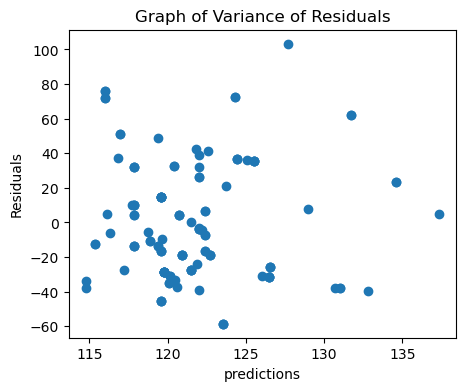

In [31]:
plt.figure(figsize=[5,4])

plt.scatter(predictions, residuals)
plt.xlabel('predictions')
plt.ylabel('Residuals')
plt.title('Graph of Variance of Residuals')

C:\Users\512GB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


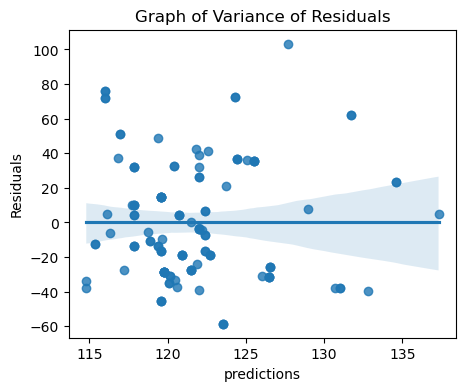

In [32]:
plt.figure(figsize=[5,4])

sns.regplot(predictions, residuals)
plt.xlabel('predictions')
plt.ylabel('Residuals')
plt.title('Graph of Variance of Residuals');

### Checking Constant Variance
The idea behind the residual plot is that we can look at how spread out the residuals are over the predicted values. If the constant variance assumption holds, then we should see a band of constant width. Below, the first plot shows what we should see, along with two examples of what would violate the assumption.
<img src='variance.svg' width=600 height=600>


Note that this check will be more of a qualitative one, rather than a quantitative one. We are really trying to make sure that we don't have the two latter situations shown in the picture. The second picture describes a situation wherein variance increases as the predicted values get higher. The third is a situation wherein there seems to be a polynomial trend in the residuals.

With this plot in mind, what do we observe in our residual plot?

- Does there seem to be an even band of dots around 0?
- Are there points that seem to have higher residual than the others? These are signs of poor predictive ability.

### Checking The Sum of Squared Errors
It's worth noting here why we bother inspecting the residual assumptions. Checking the residuals is a quick way to determine whether or not a linear regression is appropriate for the data. If there is a clear quadratic or cubic relationship between the outcome and predictors, then a linear model isn't a great choice for prediction — or it may need some more complex predictors.

Now that we've examined the assumptions of the residuals, we'll spend the last few screens checking some other model diagnostics.

Recall that the coefficients minimize the sum of squared error, also known as our cost function:
<img src='lossf.png' width=500 height=500>

We've only discussed the sum of squared errors in the context of calculating coefficients. We can also use a similar score as a rough measure of how accurate the model is. Instead of taking the sum, we can use the **mean squared error (MSE) of the data**. As the name suggests, the MSE represents the average squared error of the model. The higher this is, the less accurate we would consider the model.

If we were to calculate this on the training data, we would call it the training MSE. By itself, the **training MS**E won't tell us much besides the general magnitude of the errors. However, we **cannot** use the training MSE as our judge of the model's predictive ability. The model is optimized on the training data, so by definition the model will minimize the training MSE. We will judge the predictive ability later in the course; the focus here should just be the use of MSE as a metric for model accuracy.

In [33]:
from sklearn.metrics import mean_squared_error

train_mse= mean_squared_error(y_train, predictions)
train_rmse= mean_squared_error(y_train, predictions, squared=False)

print('training mse is:', train_mse)
print('training rmse is', train_rmse)

training mse is: 1121.588241496088
training rmse is 33.490121550930326


### The Coefficient of Determination
We'll finish this lesson with one last metric for evaluating the quality of a linear regression model. This error metric is denoted as R2(R squared), and we call it the **coefficient of determination.**

Whereas the MSE looks at the squared errors as a way to judge the model, the R2(R squared) examines how well the model accounts for the variance in the outcome. According to the linear regression model, we get the following:

<img src='lre.png' width=500 height=500>

The relationship between Y and X suggests that there is also a relationship between the variance of the two sides.

However, no models are perfect, so there is almost always a degree of error. These errors also have a variance, which is described by the sum of squared errors! Something that may be of interest to us might be **the proportion of variance that is explained by the model.** This proportion also represents how well the model approximates the data.
Thanks to some mathematical quirks, we can express the variance of the outcome as . .

<img src='var.png' width=500 height=500>

If the linear regression predicts the outcome perfectly, there would be no need for an error, and the above value would be equal to **1.** Otherwise, it's less.

If we have multiple candidate models, we might prefer the model that has the highest R2
 since it indicates that it best approximates the data. As before, we must be wary of judging a model based on metrics derived from training data. We are simply getting a general idea of how well the model fits the data it's learned from.
 
 To calculate R2
, we need to use the r2_score() function from the metrics module in scikit-learn. Its arguments are similar to those of mean_squared_error.

In [34]:
#get the coefficcient of determination

from sklearn.metrics import r2_score

coefficient_of_determination=r2_score(y_train, predictions)
coefficient_of_determination

0.016067721423534076

This means that 0.016 of variance is explained by the model.

### Review
In this lesson, we learned how to evaluate the linear regression model based on a few diagnostic measures. The first set of measures looked at the assumptions on the residuals, which are supposed to have zero mean and constant variance. Violations to the constant variance assumption look like deviations from a "constant band" on the residual plot, such as a fanning out or a polynomial trend.

We also saw that the sum of squared errors could be described as an average instead (called the mean squared error). The MSE describes the general size of the error, but this value by itself isn't very informative. Finally, we learned about the coefficient of determination 
R2, which tells us about the proportion of variance explained by the model. The higher this value is, the better the predictions that the model makes

## Applying Linear Regression Models
### Introduction

Welcome to the final lesson in the Linear Regression Modeling in Python course. We've learned how to create a model and how to evaluate it using various metrics. like residuals,. mse,rmse and coefficient of determination.Equipped with these metrics, we can finally evaluate the predictive ability of a linear regression model. So far, we've only checked some metrics using the training data to get a general sense of the magnitude of the error. Since the parameters are optimized on the training data, we should consider the training metrics to be overly optimistic.
The solution is to calculate the metrics on the test dataset. The test dataset is data that the model hasn't seen yet, so we would expect performance to be worse here. Our hope is that the test error isn't too far from the training error. What we mean by "error" can depend on the model, data and cost function we are using. In the case of linear regression, the error will be the mean squared error (MSE).

Finally, once we understand how well a model works, we may seek to improve it. These improvements can take the form of different predictors or more complex predictors in the model. We'll explore this feature selection in this lesson

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model= LinearRegression()

x=auto.drop(columns=['normalized_losses'], axis=1)
y=auto['normalized_losses']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=728)

### Test Error
In a supervised machine learning problem, we want to create a model that produces the most accurate predictions possible. We don't use the training error to judge the predictive ability of a model because it's too optimistic.

When we compare candidate models to use, we'll ultimately judge them based on their test error. The smaller the error, the better.
Computing the test error is the same process as computing the training error, except we use the test dataset instead. Since the test error is also an MSE, we can also take its square root to derive the root mean squared error (RMSE), which is on the same scale as the outcome.

We hope that the test error will be close to or smaller than the training error. This will be the case if the model is adequately general. We might be tempted to create a more complex model using polynomials or splines in order to further push down the training error.
The danger that comes with more complex models is that they might simply be learning the structure of the training data. When we apply this more complex model to the test data, our test error will be much higher than the training error. This is the issue of **overfitting**.

Let's check the test error of a model that we created in the first lesson

In [36]:
x_train_subset=x_train[['length','engine_size']]
x_test_subset= x_test[['length','engine_size']]

#fit the model

model.fit(x_train_subset, y_train)

#make predictions
train_pred= model.predict(x_train_subset)
test_pred = model.predict(x_test_subset)


train_mse= mean_squared_error(y_train, train_pred)
train_rmse= mean_squared_error(y_train, train_pred, squared=False)
test_mse= mean_squared_error(y_test, test_pred)
test_rmse= mean_squared_error(y_test, test_pred, squared=False)

print(train_mse, train_rmse, test_mse,test_rmse)

1047.1176945037557 32.35919798919244 1675.4868744730984 40.93271154557316


### Feature Selection And Correlation
The process of creating a predictive model should not be viewed as an open-and-closed process. Once we know the test MSE, we have an idea of how the model might predict on unseen data. If we feel that the test error was reasonable, then we might want to use it on future datasets. If not, we might want to iterate on our linear model and try to push down the test MSE even further.
There are several ways that we can do this. We might want to consider another class of models entirely or use different predictors. We'll focus on the latter here in the context of linear regression. The process of choosing predictors to include in a model is called feature selection. "Predictors" have many alternative names, and "feature" is one of them. We'll explore this idea over the next few screens.One of the ideas behind feature selection is that we can improve a model's predictive ability if we can choose predictors that are highly correlated with the outcome. High correlation between a predictor and the outcome implies that changes in the predictor will also come with predictable changes to the outcome. If a predictor wasn't correlated with the outcome, then changes in the predictor would be uninformative.
Correlation is applicable only to continuous predictors and outcomes, but we can extend a similar idea to categorical variables. Recall that when categorical variables are used in linear regression models, they represent changes in the average outcome when the observation is a non-reference category. Using this idea, if we plot the histograms of the outcome stratified by different categories, we can check if using the categories might be useful.
<img src='categorical.svg' width=500 height=500>

If there seems to be a significant change in the outcome, then it might be worth including that particular categorical variable.


In [37]:
corr_coef=auto.corr()
corr_coef

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine_size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


In [38]:
corr_coef['normalized_losses'].sort_values(ascending=False)

normalized_losses    1.000000
symboling            0.518344
horsepower           0.290511
peak_rpm             0.237697
engine_size          0.207820
price                0.202761
curb_weight          0.125858
width                0.109726
stroke               0.063330
length               0.035541
bore                -0.031558
wheel_base          -0.060086
compression_ratio   -0.127259
highway_mpg         -0.188564
city_mpg            -0.235523
height              -0.413702
Name: normalized_losses, dtype: float64

### More Complex Predictors
<img src='complex.png' width=400 height=400>

Polynomial predictors might be useful if the initial visualization indicates a non-linear relationship. Polynomial predictors might also be indicated if the residual plot from an initial model indicates that the residuals themselves have a polynomial trend to them.
Polynomial predictors are often the next step, but there are many other examples of complex predictors that we might want to include. These are outside the scope of this course, but it's worth knowing about for further research. These include the following:

- Logarithmic predictors (log(X1))
- Splines
- Interaction terms (βX1 × X2)
- Principal Components

In [39]:
x_train["length_squared"]=x_train["length"]**2
x_test["length_squared"]=x_test["length"]**2

x_train_subset=x_train[['length','length_squared']]
x_test_subset=x_test[['length', 'length_squared']]

model= LinearRegression()

model.fit(x_train_subset, y_train)

train_predictions= model.predict(x_train_subset)
test_predictions=  model.predict(x_test_subset)

train_rmse= mean_squared_error(y_train, train_predictions, squared=False)
test_rmse= mean_squared_error(y_test, test_predictions, squared=False)

print(train_rmse, test_rmse)



33.702701607571846 41.94637867576827


### Outcome Transformations
On the past two screens, we've discussed more complex predictors that could be included to improve predictive power. On this screen, we'll shift focus to transformations of the outcome.
Transforming the outcome serves a different purpose than transforming a predictor. Recall from our lesson on checking model fit that the residuals of a model should form an even band around zero when checked against the predicted values. That is, they should have constant variance. In some cases, the outcome itself might have several extreme values at either the low or high end. These extreme values can influence the estimated coefficients and cause the residuals to deviate from constant variance.
In these cases, it might be useful to transform the outcome so that extreme values are less pronounced. One of the most common ways to do this is the **log-transformation**. Using this transformation means **we're trying to predict the log of the outcome instead of the outcome itself:**
<img src='log_outcome.png' width=400 height=400>


The log transformation is useful when the outcome spans several magnitudes (i.e., from tens to ten-thousands) or has extreme values. By reducing the "extremeness" of outcomes, we are trying to ensure the model has constant variance in the residuals. It's not guaranteed, but it can help sometimes.
Note that calculating the MSE on the transformed outcome causes the RMSE to also be in terms of the transformation. In order to understand the RMSE in terms of the original outcome scale, we need to inverse the original transformation. For example if we calculate the MSE on log(Y), we'll need to use e raised to power RMSE to get it back on the original scale.
Even though the normalized_losses column doesn't have the problem of extreme values, we'll practice using an outcome transformation below.

In [40]:
x_train_subset=x_train[['length']]
x_test_subset= x_test[['length']]

y_train_log=np.log2(y_train)
y_test_log=np.log2(y_test)

model=LinearRegression()

model.fit(x_train_subset, y_train_log)

train_predictions = model.predict(x_train_subset)
test_predictions= model.predict(x_test_subset)

train_rmse= mean_squared_error(y_train_log, train_predictions)
test_rmse= mean_squared_error(y_test_log, test_predictions)

print('train_rmse', train_rmse)
print('test_rmse',  test_rmse)



train_rmse 0.1513886323653695
test_rmse 0.23465672212479835


### The Box-Cox Transformation
Another transformation worth knowing is the **Box-Cox transformation.** The idea behind this transformation is to try to have the outcome have a similar **distribution to a Gaussian, or bell, shape.** This bell shape also makes it more likely that the residuals will have constant variance. This transformation is located in the **scipy library,** as shown below:

`from scipy.stats import boxcox
boxcox(y)`

The Box-Cox transformation is given by the following:
<img src='box_cox.png' width=400 height=400>




where λ is a value that we can change. In the boxcox() implementation in scipy, λ
 is calculated automatically such that the input will be as close to bell-shaped as possible.

Note that the Box-Cox transformation reduces to the logarithm transform for lamda =0
. The Box-Cox transformation is limited by the fact that the values used in the transformation must be positive, so keep this in mind if you think about using it.



In [41]:
from scipy.stats import boxcox

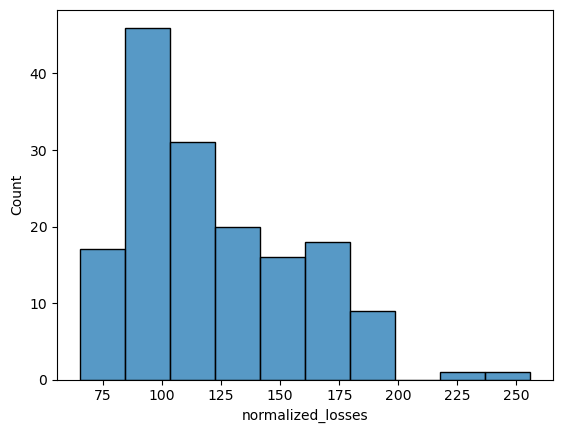

In [43]:
sns.histplot(data=auto, x='normalized_losses');

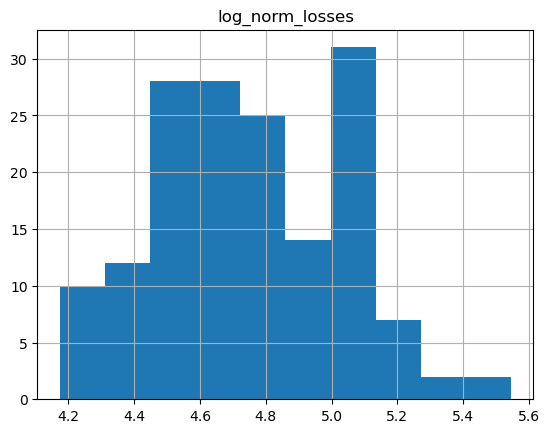

In [51]:
auto["log_norm_losses"] = boxcox(auto["normalized_losses"], lmbda = 0)
auto.hist("log_norm_losses")
plt.show()

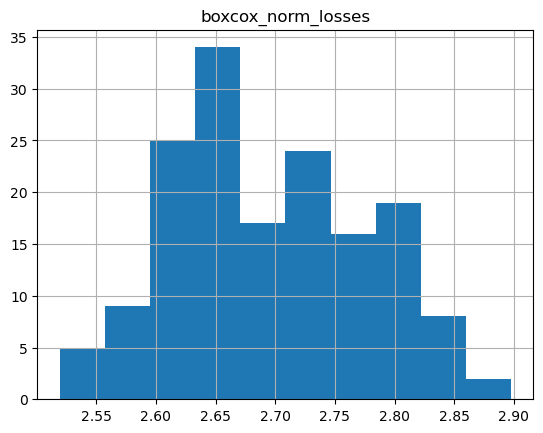

In [52]:
#use the first lmbda argument
auto["boxcox_norm_losses"] = boxcox(auto["normalized_losses"])[0]
auto.hist("boxcox_norm_losses")
plt.show()

### Communicating Results

As we finish this course, let's look back to the process we've learned. We've examined the auto dataset to understand how to best predict the normalized_losses column, using different characteristics of each car. Since we know the values of the normalized losses, this is a supervised learning problem. To approach this problem, we studied the linear regression model and how to evaluate and use it.

Now that we've constructed a few of these models, we should consider how to communicate our findings to other people. Often, these other people might be collaborators, non-technical coworkers, or even a general audience. It might be too dense to include every detail of our analysis, so we should reduce it to the essential details.
When dealing with machine learning, we should be transparent about the data and the process we used to select a final model. Here's a non-exhaustive list of questions we should consider when summarizing our model.

- How much data was used for training? What about the test set?
- Did we have to make any transformations to the outcome or predictors? If so, what justification did we make to do so?
- What predictors did we include in the model? Were there any particular reasons they were included?
- How well does our model predict unseen data? Is the level of error acceptable for its application?
- Ideally, these observations would be made as we perform each step of the machine learning workflow, culminating in a final summary at the end.

### Review
Congratulations on finishing the Linear Regression Modeling in Python course! In this lesson, we learned about linear regression and how to complete the process of creating, interpreting, and evaluating the model. Linear regressions are a simple model, but they are often a good starting point before advancing to more complex algorithms. Despite the simplicity of linear models, working with them is a good way to understand how and why to evaluate a model. Even the most complex supervised models need evaluation against some cost function.

Linear regressions can also be much more complex than we've covered here — take these lessons as an introduction. For example, models like the LASSO and Ridge regression are examples of linear models — but with the extra consideration of regularization.

We're now ready to complete the guided project, where we will see a new dataset.